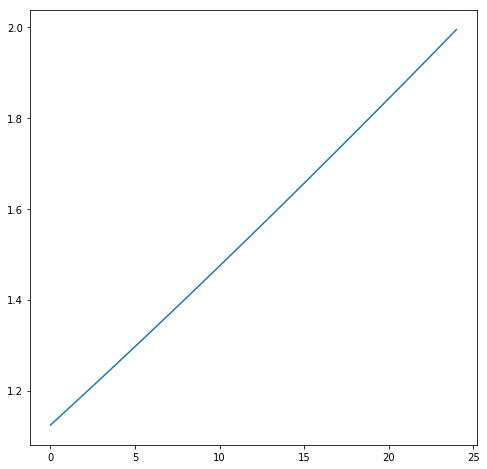

In [10]:
def get_Earth_temp(c20,T,cloud_re):

        totall_cloudAndparticle_reflectfactor=cloud_re
        ocean_t=T
        totall_h20=0.0025
        #co2单位ppm
        totall_co2=c20
        totall_co2=totall_co2*ma.pow(10,-6)
        totall_radiation=1.7*10**17
        #云及颗粒物对大气的吸收及反射影响比例系数均为0.2,短波反射，长波吸收
        
        Longwave_absorptionCoeff_h20=0.8
        def get_co2_coff(n):
            return ma.log(1.2*n+0.005*ma.pow(n,2)+1.6*ma.pow(10,-6)*ma.pow(n,3))    
        Longwave_absorptionCoeff_c02=(get_co2_coff(c20)-get_co2_coff(291.4*(ma.pow(10,-6))))*3.3
        Shortwave_absorptionCoeff=0.15
        Longwave_absorptionCoeff_air=0
        land_noIce=103
        land_Ice=46
        ocean_noIce=335
        ocean_Ice=26
        h20_climate_changefactor=0.08
        c20_climate_changefactor=0.1
        Earth_R=6378.137*(10**3)
        Earth_S=ma.pi*Earth_R**2
        Earth_C=Earth_S/0.67
        M_Atmosphere=6000*10**15
        #进入到地面的辐射

        Earth_surface_radiation=totall_radiation*(1-Shortwave_absorptionCoeff-totall_cloudAndparticle_reflectfactor)
        #陆地及海洋受到辐射总和
        land_radiation=0.3*Earth_surface_radiation
        ocean_radiation=0.7*Earth_surface_radiation
        #陆地及海洋反射辐射,白天
        land_noIce_factor=land_noIce/(land_noIce+land_Ice)
        ocean_noIce_factor=ocean_noIce/(ocean_noIce+ocean_Ice)
        radiation_landReflect=land_radiation*(land_noIce_factor*0.18+(1-land_noIce_factor)*0.85)
        radiation_oceanReflect=ocean_radiation*(ocean_noIce_factor*0.07+(1-ocean_noIce_factor)*0.7)
        radiation_Reflect_daytime=radiation_landReflect+radiation_oceanReflect
        #白天辐射散热及大气吸收,短波吸收
        radiation_out_AtmosphereAbsorb_daytime=(totall_radiation+radiation_Reflect_daytime)*Shortwave_absorptionCoeff
    #     radiation_out_totall_daytime=radiation_totall_daytime*(1-0.15)

        #夜晚：陆地及海洋辐射经过大气被大气吸收的辐射，考虑云层吸收
        land_absorb_radiation=land_radiation-radiation_landReflect
        ocean_absorb_radiation=ocean_radiation-radiation_oceanReflect
        AtmosphereAbsorbFactor_night=(totall_h20*Longwave_absorptionCoeff_h20*h20_climate_changefactor+totall_co2*Longwave_absorptionCoeff_c02*c20_climate_changefactor+(1-totall_h20-totall_co2)*Longwave_absorptionCoeff_air)
        #陆地吸收系数由大气成分确定，海洋则将吸收热量辐射传热给大气

        def get_ocean_Ra(t,x):    
        #参数为海洋平均温度t，海洋吸收总辐射x
        #获得海洋发射辐射量
            factor=0.13*ma.log(1+1.5*pow(t-13.1/13.1,2))+0.32
            q_cloud=x*factor
            return q_cloud

        radiation_out_AtmosphereAbsorb_night=get_ocean_Ra(ocean_t,ocean_absorb_radiation)+land_absorb_radiation
    #     ocean_absorb_keep=radiation_out_AtmosphereAbsorb_night*0.7*0.5
        Atmosphere_absorb_keep=(radiation_out_AtmosphereAbsorb_daytime+radiation_out_AtmosphereAbsorb_night)*AtmosphereAbsorbFactor_night
        #夜晚，地球散热
        radiation_landdirct_out_space=(land_absorb_radiation+ocean_absorb_radiation)*(1-AtmosphereAbsorbFactor_night)
        radiation_out_space=radiation_out_AtmosphereAbsorb_night*0.5
        #总散热
    #     radiation_out_totall=radiation_landdirct_out_space+radiation_out_space+radiation_out_totall_daytime+radiation_in_AtmosphereReflect
        temp=Atmosphere_absorb_keep/Earth_C
        def get_cloud_reflect(t,x):
            #参数为海洋平均温度t，海洋吸收总辐射x
            #获得云总反射系数
            w=(2501.0-2382.5)/50
            qi=(2501-t*w)
            m0=44.8*ma.pow(10,12)
            u=2*0.2*0.51*x/(qi*m0)
            return u
        a=get_cloud_reflect(ocean_t,ocean_absorb_radiation)
    #     print('co2的气候系数为：%f'%(ma.pow(10,-6)*Longwave_absorptionCoeff_c02*c20_climate_changefactor))
    #     print('大气吸收辐射系数：%f'%AtmosphereAbsorbFactor_night)
        return temp,a,totall_cloudAndparticle_reflectfactor



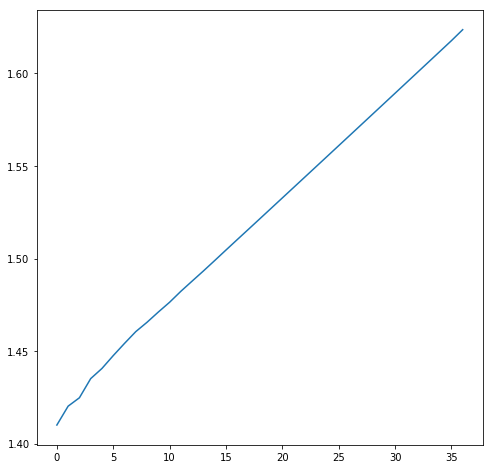

In [28]:
year_team=[]
year_T=[]
s=0
co2=data['co2']
T=data['sst']
for n,m in zip(co2,T):

    temps,cloud_fa,col=get_Earth_temp(n,m,0.15)
    year_team.append(temps)
    year_T.append(cloud_fa)
    
plt.figure(figsize=(8,8))
plt.plot(year_team)
    

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as ma

In [26]:
data=pd.read_excel(r'E:\研究生数学建模\prediction_data.xlsx')

In [27]:
data.head()

,year,co2,sst
0,2010,388.981345,14.210992
1,2011,391.771712,14.197799
2,2012,393.238620,14.139196
3,2013,395.608517,14.231150
4,2014,397.217181,14.199316


In [29]:
prediction=pd.DataFrame({'Team':year_team})
prediction=pd.concat([prediction,data['year']],axis=1)

In [30]:
prediction=prediction.set_index('year')
prediction.to_excel('E:\研究生数学建模\prediction_result.xlsx')